### Will a Customer Accept the Coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**


This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)

3. Coupon attributes
    - time before it expires: 2 hours or one day

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [5]:
data = pd.read_csv("C://Users/milin/Documents/AI_ML/Module 5/data/coupons.csv")

In [6]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [7]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [8]:
data["Bar"].fillna("never", inplace = True) #replaced null values with mean
data["RestaurantLessThan20"].fillna("1~3", inplace = True) #replaced null values with mean
data["CarryAway"].fillna("1~3", inplace = True) #replaced null values with mean
data["CoffeeHouse"].fillna("less1", inplace = True) #replaced null values with mean
data["Restaurant20To50"].fillna("less1", inplace = True) #replaced null values with mean

data.isnull().sum()



destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                         0
CoffeeHouse                 0
CarryAway                   0
RestaurantLessThan20        0
Restaurant20To50            0
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [9]:
#replace 50plus and below21 string with 51 and 20

data['age'].replace('50plus',51,inplace=True)  
data['age']=data['age'].replace('below21',20)

#change the data type
data['age']=data['age'].astype(int)

data['age'].value_counts()

21    2653
26    2559
31    2039
51    1788
36    1319
41    1093
46     686
20     547
Name: age, dtype: int64

4. What proportion of the total observations chose to accept the coupon? 

Ans - 57 Percent chose to accept the coupon



In [10]:
accepted_the_coupon =round((data['Y'].value_counts() [1] / data['Y'].value_counts().sum()) * 100)

accepted_the_coupon

57

5. Use a bar plot to visualize the `coupon` column.

<AxesSubplot:title={'center':'Coupon Counts'}>

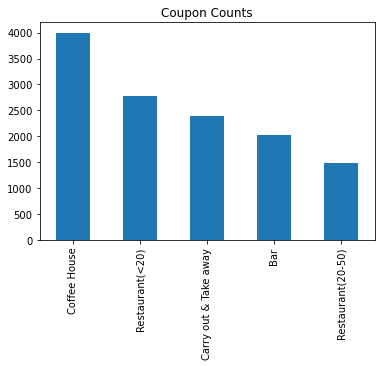

In [12]:
#Visualize the column "coupon" data in a Bar plot

data['coupon'].value_counts() 

data['coupon'].value_counts().plot.bar(title = "Coupon Counts")

6. Use a histogram to visualize the temperature column.

In [13]:
data['temperature'].value_counts()

80    6528
55    3840
30    2316
Name: temperature, dtype: int64

<AxesSubplot:title={'center':'Temprature Frequency'}, ylabel='Frequency'>

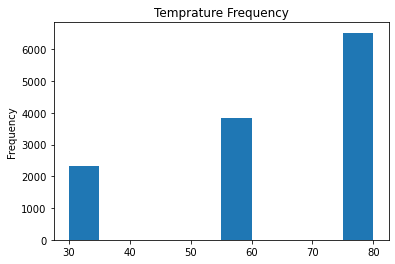

In [14]:
data['temperature'].plot.hist(title = "Temprature Frequency")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
# New DataFrame for bar coupons

data1=pd.DataFrame(data.loc[data['coupon'] == 'Bar']) 

In [16]:
data1

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12663,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12664,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12667,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0
12670,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Male,26,Single,...,never,1~3,4~8,1~3,1,1,0,0,1,0


In [17]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2017 entries, 9 to 12682
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           2017 non-null   object
 1   passanger             2017 non-null   object
 2   weather               2017 non-null   object
 3   temperature           2017 non-null   int64 
 4   time                  2017 non-null   object
 5   coupon                2017 non-null   object
 6   expiration            2017 non-null   object
 7   gender                2017 non-null   object
 8   age                   2017 non-null   int32 
 9   maritalStatus         2017 non-null   object
 10  has_children          2017 non-null   int64 
 11  education             2017 non-null   object
 12  occupation            2017 non-null   object
 13  income                2017 non-null   object
 14  car                   13 non-null     object
 15  Bar                   2017 non-null  

2. What proportion of bar coupons were accepted?
Ans = 41percent of the bar coupons were accepted


In [18]:
#Percentage coupon accepted
accepted_the_coupon =round((data1['Y'].value_counts() [1] / data1['Y'].value_counts().sum()) * 100)

accepted_the_coupon

41

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.

Ans:
    1. acceptance rate of those who went to bar 3 times or fewer is 13 percent
    2. acceptance rate of those who went to bar more times is 3 percent


In [19]:
# No. who went to bar 3 or fewer times
went_to_bar_3times=data1['Bar'].value_counts()['1~3']+data1['Bar'].value_counts()['less1']
#No. who went to bar more
went_to_bar_more=data1['Bar'].value_counts()['4~8']+data1['Bar'].value_counts()['gt8']
print(went_to_bar_3times)
print(went_to_bar_more) 

967
199


In [20]:
#acceptance rate of those who went to bar 3 times or fewer

a=round((went_to_bar_3times/data['Y'].value_counts()[1])*100)
a

13

In [21]:
# Total count of acceptance, where Y=1
data['Y'].value_counts()[1]

7210

In [22]:
#acceptance rate of those who went to bar more time
b=round((went_to_bar_more/data['Y'].value_counts()[1])*100)
b

3

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

Ans:

1.acceptance rate those who went to bar more than once a month is: 6 percent

2.acceptance rate those who are over the age of 25 is : 8 percent


In [23]:
# Create a new DataFrame that shows data where age is greater than 25 and accpeted the coupons

data2=pd.DataFrame(data1[(data1["age"]>25) & (data1['Y']==1)])

data2

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,1
79,Home,Alone,Sunny,55,6PM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,0,0,1,0,1
83,Work,Alone,Sunny,55,7AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,1,0,1,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12485,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12591,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Female,51,Divorced,...,less1,1~3,1~3,less1,1,1,0,0,1,1
12644,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,1,0,0,1,1


In [24]:
# get the counts of various ages in the new DataFrame
data2['age'].value_counts()

26    193
31    125
51     84
41     77
36     63
46     38
Name: age, dtype: int64

In [25]:
data_final=pd.DataFrame(data1[((data1["Bar"]=='4~8') | (data1["Bar"]=='1~3') | (data1["Bar"]=='gt8')) & (data1['Y']==1)])
data_final

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
90,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,0,1,1
101,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,1~3,less1,1~3,1,0,0,1,0,1
112,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,0,1,1
123,Home,Alone,Sunny,55,6PM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,0,0,1,0,1
127,Work,Alone,Sunny,55,7AM,Bar,1d,Male,26,Unmarried partner,...,gt8,4~8,1~3,less1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12482,No Urgent Place,Friend(s),Sunny,55,10PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12485,No Urgent Place,Alone,Rainy,55,10AM,Bar,1d,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12488,No Urgent Place,Partner,Rainy,55,6PM,Bar,2h,Female,26,Unmarried partner,...,never,4~8,4~8,less1,1,1,0,0,1,1
12525,No Urgent Place,Friend(s),Sunny,80,10PM,Bar,1d,Male,21,Unmarried partner,...,never,gt8,4~8,1~3,1,1,0,0,1,1


In [26]:
#count of accepted coupons from teh "data_final, DataFrame"
data_final['Y'].value_counts()

1    410
Name: Y, dtype: int64

In [27]:
#acceptance rate amongst those who went to bar more than once a month 

moreThan1= (data_final['Y'].value_counts()/data['Y'].value_counts()[1])*100
moreThan1

1    5.686546
Name: Y, dtype: float64

In [28]:
#acceptance rate those who are over the age of 25

agegreaterThan25= (data2['Y'].value_counts()/data['Y'].value_counts()[1])*100
agegreaterThan25

1    8.044383
Name: Y, dtype: float64

5. Construct a null and alternative hypothesis for the difference between groups of drivers who go to a bar more than once a month and are over the age of 25 to all other drivers. 

6. Using alpha at 0.05 test your hypothesis and state your conclusion.

7. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


8. Compare the acceptance rates between those passengers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



1) go to bars more than once a month, had passengers that were not a kid, and were not widowed 

Ans:

1.acceptance rate amongst those who went to bar more than once a month, had passengers that were not a kid is 5 percent

2.acceptance rate amongst those who went to bar more than once a month, were not widowed is 6 percent

In [29]:
# count of passengers that were not a kid

notKid=pd.DataFrame(data_final[(data_final["passanger"]!="Kid(s)")])
notKid["passanger"].value_counts().sum()

393

In [30]:
# count of passengers that were not widowed

notWid=pd.DataFrame(data_final[(data_final["maritalStatus"]!="Widowed")])
notWid["Y"].value_counts().sum()

410

In [31]:
# Total count of acceptance, where Y=1
data['Y'].value_counts()[1]

7210

In [34]:
# acceptance rate amongst those who went to bar more than once a month, had passengers that were not a kid
assd=round((notKid['Y'].value_counts()/data['Y'].value_counts()[1])*100)
assd

1    5.0
Name: Y, dtype: float64

In [35]:
#acceptance rate amongst those who went to bar more than once a month, were not widowed
assd1=round((notWid['Y'].value_counts()/data['Y'].value_counts()[1])*100)
assd1

1    6.0
Name: Y, dtype: float64

2) go to bars more than once a month and are under the age of 30

Ans:

1.acceptance rate amongst those who went to bar more than once a month is 6 percent

2.acceptance rate amongst those who went to bar that are under the age of 30 is 3 percent

In [36]:
# Counts in various age categories
data_final['age'].value_counts()

26    131
21    114
31     63
51     45
41     21
36     20
46     12
20      4
Name: age, dtype: int64

In [37]:
#Under 30 count

under30=pd.DataFrame(data_final[(data_final["age"]<31)])
under30['age'].value_counts().sum()

249

In [38]:
# Total count of acceptance, where Y=1
data['Y'].value_counts()[1]

7210

In [63]:
#acceptance rate amongst those who went to bar that are under the age of 30
under30_final=round((under30['age'].value_counts().sum()/data['Y'].value_counts()[1])*100)
under30_final

3

In [62]:
#acceptance rate amongst those who went to bar more than once a month
moreThan1= round((data_final['Y'].value_counts()/data['Y'].value_counts()[1])*100)
moreThan1

1    6.0
Name: Y, dtype: float64

3) go to cheap restaurants more than 4 times a month and income is less than 50K

Ans:

1.acceptance rate those who went to cheap restaurants more than 4 times a month is 40 percent

2.acceptance rate those income is less than 50K is 45 percent

In [51]:
rescheap=pd.DataFrame(data[((data['RestaurantLessThan20']=='4~8') | (data["RestaurantLessThan20"]=='gt8')) & (data['Y']==1)])
rescheap['RestaurantLessThan20'].value_counts().sum()

2874

In [52]:
# Total count of acceptance, where Y=1
data['Y'].value_counts()[1]

7210

In [61]:
#acceptance rate those who went to cheap restaurants more than 4 times a month
rescheep_final= round((rescheap['RestaurantLessThan20'].value_counts().sum()/data['Y'].value_counts()[1])*100)
rescheep_final

40

In [58]:
#count of those whose income is less than 50k

less50=pd.DataFrame(data[((data['income']=='$25000 - $37499') | (data["income"]=='$12500 - $24999')| (data["income"]=='$37500 - $49999')) & (data['Y']==1)])
less50['income'].value_counts().sum()

3264

In [60]:
#acceptance rate those income is less than 50K

less50_final= round((less50['income'].value_counts().sum()/data['Y'].value_counts()[1])*100)
less50_final

45

9.  Based on these observations, what do you hypothesize about passengers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  